<a href="https://colab.research.google.com/github/KimJisanER/LAIDD/blob/main/LAIDD_Practice2_RDKit_fingerprints_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fingerprint 생성 및 유사도 계산 예제
----------

### 우선 RDKit 설치!

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

import sys
sys.path

import condacolab
condacolab.check()

!mamba install -c conda-forge rdkit==2021.03.5

## SMILES 파일로 부터 분자 읽어들이기
------

In [2]:
import rdkit

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.IPythonConsole import drawMol3D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [4]:
molecules = []
for smi in open("drugs.smi").readlines():
    m = Chem.MolFromSmiles(smi)
    molecules.append(m)

In [5]:
len(molecules)

600

In [6]:
m_target = molecules[100]

In [7]:
m2 = Chem.AddHs(m_target)

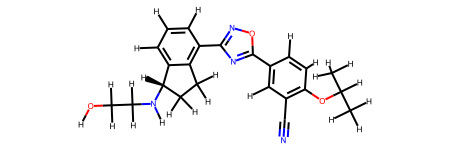

In [8]:
m2

In [9]:
from rdkit.Chem import AllChem

In [10]:
AllChem.EmbedMolecule(m2) # 리턴 값은 0이지만 m2 자체의 좌표가 변환된다. 

0

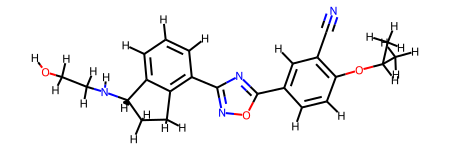

In [11]:
m2

In [12]:
# EmbedMolecule의 결과는 상당히 rough한 결과이다. 여러가지 가정아래에 만들어진 구조이다. 

## 3차원 구조 최적화
------

위에서 얻은 구조를 한 번 더 MMFF force-field를 이용해서 최적화를 해준다. 

In [13]:
AllChem.MMFFOptimizeMolecule(m2)

1

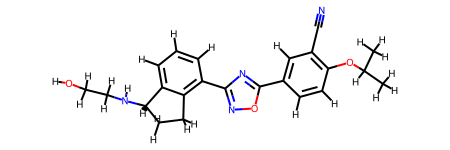

In [14]:
m2

In [15]:
print(Chem.MolToMolBlock(m2)) # m2는 최적화된 3D 구조를 가지고 있는 molecule 변수. 


     RDKit          3D

 54 57  0  0  0  0  0  0  0  0999 V2000
    9.0277   -0.1106   -0.4182 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.9081    0.6668    0.2634 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.4721    1.8511    1.0417 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0405    1.1871   -0.7579 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.7305    0.8123   -0.6206 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.7468    1.8012   -0.5266 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3980    1.4281   -0.4251 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0176    0.0759   -0.4345 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0177   -0.8996   -0.5597 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.3640   -0.5349   -0.6608 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6064   -0.2723   -0.3178 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5578    0.5081   -0.1911 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4894   -0.3916   -0.1193 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0974   -1.6747   -0

In [16]:
print(Chem.MolToMolBlock(m2), file = open("foo.mol", "w+"))

In [17]:
m = Chem.MolFromSmiles('C1CCC1OC')

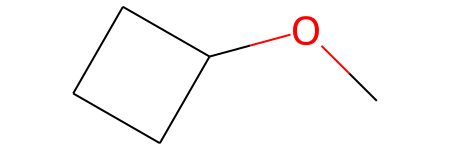

In [18]:
m

In [19]:
m2=Chem.AddHs(m)

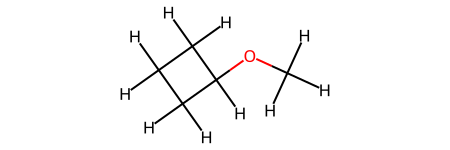

In [20]:
m2

# Fingerprint 계산
-------

In [21]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')

In [22]:
print(m1)

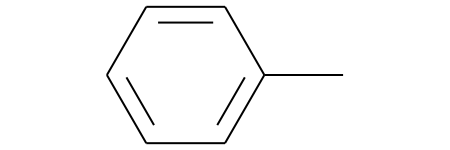

In [23]:
m1

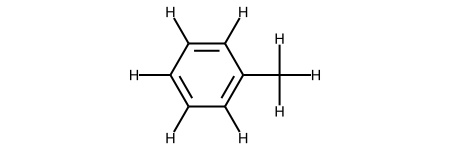

In [24]:
Chem.AddHs(m1)

## Extended Fingerprint (ECFP) 계산
------


ECFP 계산의 경우, 몇 개의 공유 결합까지 허용하는 fragment를 만들 것인지를 정해주어야 함. 

https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html#rdkit.Chem.rdMolDescriptors.GetMorganFingerprint

일단 공유 결합 반경을 2로 설정해보자. 

즉 ECFP4 fingerprint를 생성해보자. 

In [25]:
fp1 = AllChem.GetMorganFingerprint(m1,2)

기본적으로 Morgan fingerprints, ECFP는 fragment의 개수를 정보를 기본으로 사용한다. 


In [26]:
print(fp1)

SpartseIntVect 타입으로 저장된다. 

In [27]:
fp1

IntSparseIntVect 타입 변수는 어떤 method가 사용 가능한지 확인해보자. 

In [28]:
dir(fp1)

['GetLength',
 'GetNonzeroElements',
 'GetTotalVal',
 'ToBinary',
 'UpdateFromSequence',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__']

In [29]:
fp1.GetLength()

4294967295

가능한 모든 fragment의 가장 큰 값은 4294967295로 주어져 있다. 

기본적으로 Morgan fingerprints, ECFP는 fragment의 개수를 정보를 기본으로 사용한다. 

결과적으로 AllChem.GetMorganFingerprint 에서 얻어지는 결과는 특정 fragment가 얼마나 자주 나타나는지를 count한 결과이다. 

In [30]:
fp1.GetNonzeroElements()

{98513984: 3,
 422715066: 1,
 908339072: 1,
 951226070: 2,
 2246728737: 1,
 2763854213: 1,
 3207567135: 1,
 3217380708: 1,
 3218693969: 5,
 3999906991: 2,
 4244175903: 2}

### Morgan Fingerprint as a bit vector
------

0과 1의 조합으로 나타내어 보자. 

https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html#rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect

In [31]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,2,nBits=1024)

얻어지는 결과물은 ExplicitBitVect 타입의 변수이다. 

In [32]:
print(fp1)

어떤 method가 사용 가능한지 확인. 

In [33]:
dir(fp1)

['FromBase64',
 'GetBit',
 'GetNumBits',
 'GetNumOffBits',
 'GetNumOnBits',
 'GetOnBits',
 'SetBit',
 'SetBitsFromList',
 'ToBase64',
 'ToBinary',
 'ToBitString',
 'UnSetBit',
 'UnSetBitsFromList',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__invert__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__']

In [34]:
fp1.ToBitString()

'000000000000000000000000000000010100000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

위와 같이 1024개의 bit로 표현 가능하다.

## 분자 사이의 유사도 계산
-----

이제 fingerprint를 이용하여 분자 사이의 유사도 계산을 진행하는 방법을 알아보자. 

In [35]:
from rdkit import Chem

In [36]:
molecules = []
for smi in open("drugs.smi").readlines():
    m = Chem.MolFromSmiles(smi)
    m2 = Chem.AddHs(m)
    molecules.append(m2)

In [37]:
print(len(molecules))

600


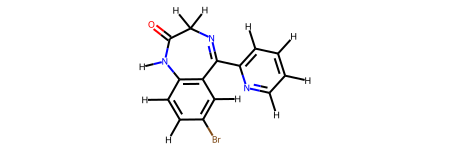

In [38]:
molecules[0]

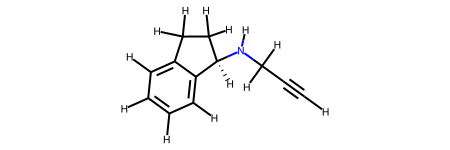

In [39]:
molecules[1]

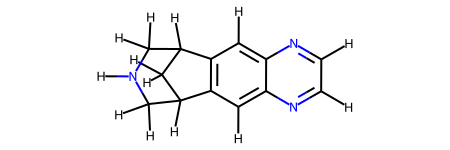

In [40]:
molecules[3]

In [41]:
m1 = molecules[0]
m2 = molecules[1]

In [42]:
from rdkit.Chem import AllChem

In [43]:
fps = [] # fingerprint를 저장할 빈 리스트. 
for m in molecules:
  fps.append(AllChem.GetMorganFingerprint(m, 2)) # ECFP4 생성

In [44]:
fp1 = fps[0]

In [45]:
fp2 = fps[1]

In [46]:
print(fp1)

In [47]:
print(fp2)

In [48]:
dir(fp1)

['GetLength',
 'GetNonzeroElements',
 'GetTotalVal',
 'ToBinary',
 'UpdateFromSequence',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__']

In [49]:
fp1.GetNonzeroElements() # 0이 아닌 정수리스트를 확인. 

{10565946: 1,
 36538691: 1,
 56091288: 7,
 231329144: 1,
 295224923: 1,
 490247508: 6,
 618185734: 1,
 631553871: 1,
 658782932: 1,
 772606658: 1,
 829315160: 2,
 864942730: 1,
 886246489: 1,
 1101907775: 1,
 1319199979: 1,
 1461310226: 1,
 1665999679: 1,
 1957005222: 1,
 2013031783: 1,
 2041434490: 2,
 2092489639: 1,
 2277419761: 1,
 2912088145: 1,
 2976816164: 1,
 3067762898: 1,
 3210252437: 1,
 3217380708: 13,
 3265829077: 1,
 3352400832: 1,
 3430949351: 1,
 3602415581: 1,
 3612926680: 1,
 3624363645: 1,
 3632350815: 1,
 3650455129: 1,
 3798139026: 1,
 3838343967: 1,
 3974650111: 1,
 3980805843: 1,
 4240369074: 1,
 4277593716: 10}

In [50]:
fp_bits = []
for m in molecules:
  fp_bits.append(AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024))# 1024개의 0/1로 표현해라. 

In [51]:
fp1_bit = fp_bits[0]

In [52]:
type(fp1_bit)

rdkit.DataStructs.cDataStructs.ExplicitBitVect

In [53]:
fp2_bit = fp_bits[1]

In [54]:
dir(fp1_bit)

['FromBase64',
 'GetBit',
 'GetNumBits',
 'GetNumOffBits',
 'GetNumOnBits',
 'GetOnBits',
 'SetBit',
 'SetBitsFromList',
 'ToBase64',
 'ToBinary',
 'ToBitString',
 'UnSetBit',
 'UnSetBitsFromList',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__invert__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__']

In [55]:
fp1_str = fp1_bit.ToBitString() # 0과 1로 이루어진 문자열로 출력!

In [56]:
fp1_str

'000000100000000000000000000000000000100000000000000000000000000000000000000000000100000011000000000000000000000000000000000000000000000000000000001001000000000000000000000000000000000000000000000000000000000000100100000000000000000000010000000000000000000100000000000000000000000000000000000000000000000000000000001000000001000000000000000010000000000000001001000000000000000010100000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010100010000000000000000000010000000010000000000001000000000000010000000000000000000000000000000000000000010000000000000000110001000000000000000000000000100000000000000000000000000000000100000000000010000000000000000000000000000000100000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000000000000000100000000000000000000000000001000000000

In [57]:
len(fp1_str)

1024

In [58]:
fp2_str = fp2_bit.ToBitString()

In [59]:
fp2_str

'000000000000000100000100000000000000100000000000000000000000000010000000000000000000000010000000000000000000000000100000000001000000000000010000001000000000000000000000001000000000000000000000000000000000000100000000000010001010000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000010000000000000001000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000001000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000010000000000000000000000000010000000000000000000000000000000000010000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000010000000000000000000000000000000001000000000000000000000000100000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000

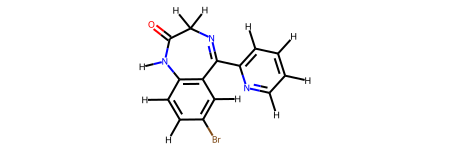

In [60]:
m1

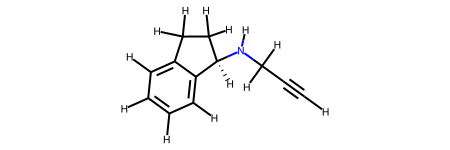

In [61]:
m2

# Similarity 계산
-------

https://www.rdkit.org/docs/source/rdkit.DataStructs.html

In [62]:
# Similarity 계산을 위해서 Datastructs 모듈을 읽어들임.
from rdkit import DataStructs 

### Tanimoto similarity
-----
![picture](https://miro.medium.com/max/1200/0*LtCn9l019IeLViyP)

![picture](https://images.deepai.org/glossary-terms/jaccard-index-9707615.jpg)

Tanimoto similarity는 간단히 말해 교집합의 개수를 합집합의 개수로 나눈 것을 의미한다. 

이는 rdkit.DataStructs.FingerprintSimilarity 와 rdkit.DataStructs.TanimotoSimilarity 두 가지의 함수를 이용해서 계산할 수 있다. 

**주의: Morgan Fingerprint는 rdkit.DataStructs.FingerprintSimilarity를 이용해서 계산이 되지 않는다.** 

FingerprintSimilarity를 사용하기 위해서는 GetMorganFingerprintAsBitVect 함수를 이용해서 bit vector로 표현해야 한다. 

In [63]:
# Tanimoto Coefficient 계산: DataStructs.FingerprintSimilarity, DataStructs.TanimotoSimilarity

In [64]:
DataStructs.FingerprintSimilarity(fp1_bit, fp2_bit) # 0/1로 되어있는 fingerprint를 사용. 

0.16393442622950818

아래 계산은 error가 난다. 

왜냐하면, fp1과 fp2가 SparseIntVect 타입이기 때문이다. 

In [65]:
DataStructs.FingerprintSimilarity(fp1, fp2)

AttributeError: ignored

TanimotoSimilarity의 값은 위의 유사도 값과 동일하다. 

즉, FingerprintSimilarity의 기본은 TanimotoSimilarity이다. 

In [66]:
DataStructs.TanimotoSimilarity(fp1_bit, fp2_bit)

0.16393442622950818

TanimotoSimilarity를 사용하는게 일반적이다.

In [67]:
#임의의 두개의 bit vector (0/1로 이루어진)에서 합집합: 둘 중에 하나라도 1인 경우에 1로 표현. 

In [68]:
#임의의 두개의 bit vector (0/1로 이루어진)에서 교집합 (interaction): 둘 다 1인 경우에 1로 표현. 

### Dice simillarity
![picture](https://wikimedia.org/api/rest_v1/media/math/render/svg/a80a97215e1afc0b222e604af1b2099dc9363d3b)

In [69]:
DataStructs.DiceSimilarity(fp1, fp2) # fp1과 fp2 사이의 Dice similarity 비교. 

0.4

## 예제: drugs.smi 파일에서 첫번째 분자와 유사도 0.45 이상인 분자들을 찾아보자. 


In [72]:
from tqdm import tqdm
fp1 = fps[0] # 첫번째 분자의 fingerprint
for idx, fp in tqdm(enumerate(fps[1:])):
  sim = DataStructs.TanimotoSimilarity(fp, fp1)
  if sim > 0.45:
    smiles = Chem.MolToSmiles(molecules[idx+1])
    print(f"\nIndex: {idx}\t{smiles} is highly similar to the first molecule: Tc = {sim:.3f}")

599it [00:00, 146888.92it/s]


Index: 184	[H]c1nc(C([H])([H])[H])n2c1C([H])([H])N=C(c1c([H])c([H])c([H])c([H])c1F)c1c([H])c(Cl)c([H])c([H])c1-2 is highly similar to the first molecule: Tc = 0.461

Index: 415	[H]c1c([H])c([H])c(C2=NC([H])([H])C(=O)N(C([H])([H])[H])c3c([H])c([H])c(Cl)c([H])c32)c([H])c1[H] is highly similar to the first molecule: Tc = 0.514


# Exercise
-----
**ECFP2**와 Tanimoto similariy 를 이용해서 유사도가 0.45 이상인 분자들의 pair 들을 찾아보자. 

앞서 얻은 결과와 어떻게 다른지 살펴보라. 

nbits=2048로 바꾸면 결과가 어떻게 달라지는지 확인해보라. 

In [73]:
ecfp2_1024 = []
for m in molecules:
  fp = AllChem.GetMorganFingerprintAsBitVect(m,2, nBits=2048)
  ecfp2_1024.append(fp)

In [78]:
fp0 = ecfp2_1024[0]
for idx, fp in enumerate(ecfp2_1024[1:]):
  sim = DataStructs.TanimotoSimilarity(fp0, fp)
  if sim > 0.45 :
    smiles = Chem.MolToSmiles(molecules[idx+1])
    print(f"\nIndex: {idx}\t{smiles} is highly similar to the first molecule: Tc = {sim:.3f}")

In [79]:
fp0 = ecfp2_1024[0]
for idx, fp in enumerate(ecfp2_1024[1:]):
  sim = DataStructs.TanimotoSimilarity(fp0, fp)
  if sim > 0.3 :
    smiles = Chem.MolToSmiles(molecules[idx+1])
    print(f"\nIndex: {idx}\t{smiles} is highly similar to the first molecule: Tc = {sim:.3f}")


Index: 151	[H]c1nc2c(c([H])c1[H])C(=O)N([H])c1c(nc([H])c([H])c1C([H])([H])[H])N2C1([H])C([H])([H])C1([H])[H] is highly similar to the first molecule: Tc = 0.302

Index: 415	[H]c1c([H])c([H])c(C2=NC([H])([H])C(=O)N(C([H])([H])[H])c3c([H])c([H])c(Cl)c([H])c32)c([H])c1[H] is highly similar to the first molecule: Tc = 0.362
